# **Imports**

In [146]:
import sqlite3
import pandas as pd

In [147]:
#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# **A. Análise de Vendas**

**1. Total de Vendas por Canal**

Calcule o valor total de vendas por canal de aquisição (Outbound vs Inbound) em um período específico (por exemplo, no último trimestre).

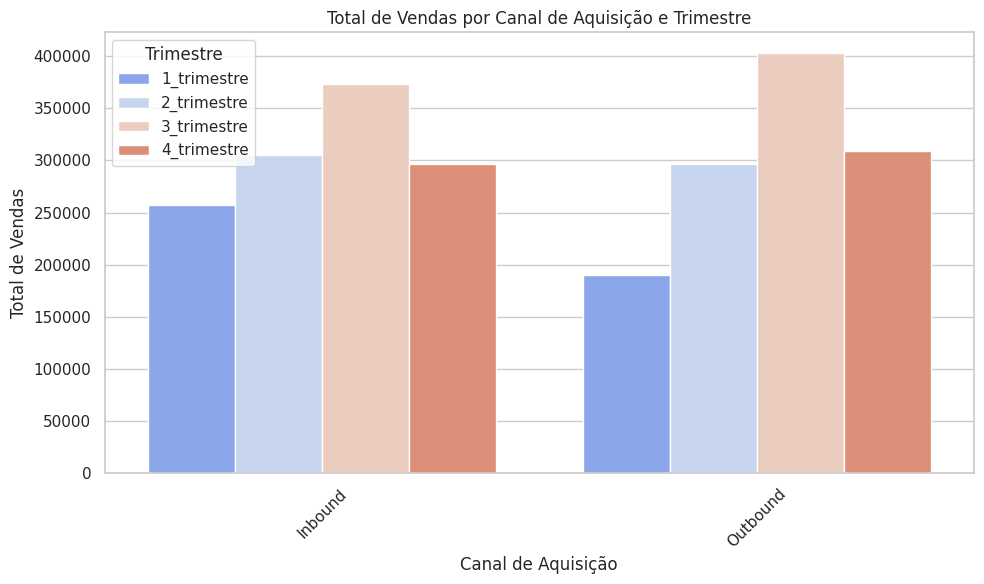

In [148]:
query1 = """
SELECT
	canal_aquisicao,
	SUM(valor_total) AS 'total_vendas',
	CASE
		WHEN STRFTIME('%m', data_venda) BETWEEN '01' AND '03' THEN '1_trimestre'
		WHEN STRFTIME('%m', data_venda) BETWEEN '04' AND '06' THEN '2_trimestre'
		WHEN STRFTIME('%m', data_venda) BETWEEN '07' AND '09' THEN '3_trimestre'
		WHEN STRFTIME('%m', data_venda) BETWEEN '10' AND '12' THEN '4_trimestre'
		ELSE 'invalido'
	END AS trimestre_venda
FROM Vendas
GROUP BY canal_aquisicao, trimestre_venda
ORDER BY canal_aquisicao, trimestre_venda
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

df1 = pd.read_sql_query(query1, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x="canal_aquisicao", y="total_vendas", hue="trimestre_venda", palette="coolwarm")
plt.title("Total de Vendas por Canal de Aquisição e Trimestre")
plt.xlabel("Canal de Aquisição")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.legend(title="Trimestre")


plt.tight_layout()
plt.show()


**2. Top Produtos:**

Identifique os 5 produtos com maior volume de vendas e calcule a margem de lucro média para esses produtos.

<ipython-input-149-a6b669a60e7f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df2, x="nome_produto", y="total_vendido", palette="coolwarm")


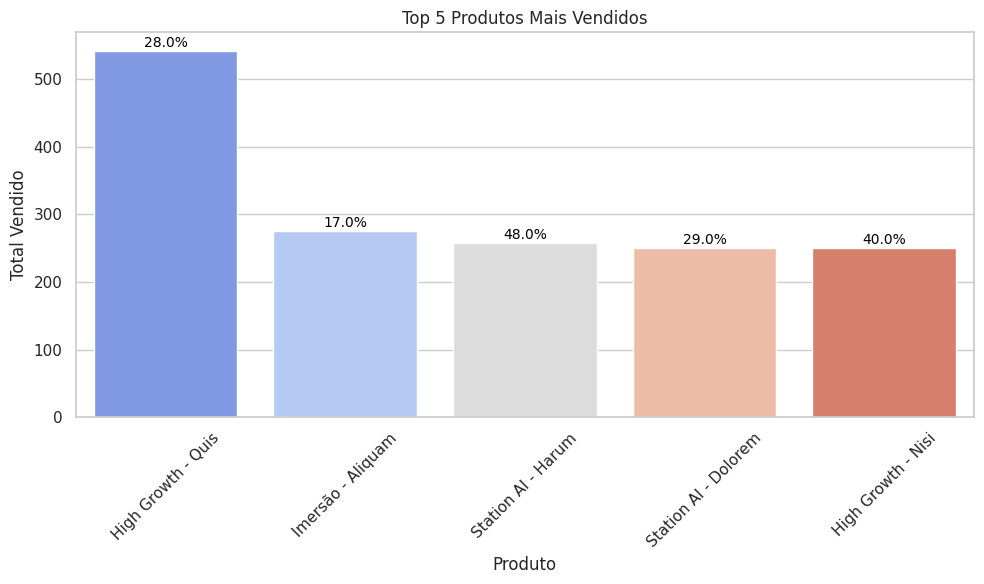

In [149]:
# Query SQL
query2 = """
SELECT
	p.nome_produto,
	SUM(v.quantidade) AS 'total_vendido',
	p.preco_unitario,
	p.custo_unitario,
	AVG((p.preco_unitario - p.custo_unitario) / p.preco_unitario * 100 ) AS 'margem_lucro'
FROM Vendas v
JOIN Produtos p ON v.id_produto = p.id_produto
GROUP BY p.nome_produto
ORDER BY total_vendido DESC
LIMIT 5
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar o resultado em um DataFrame
df2 = pd.read_sql_query(query2, conn)

# Criar o gráfico de barras para o total vendido
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df2, x="nome_produto", y="total_vendido", palette="coolwarm")
plt.title("Top 5 Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Total Vendido")
plt.xticks(rotation=45)

# Adicionar anotações com a margem de lucro em cada barra
for i, row in df.iterrows():
    ax.text(i, row["total_vendido"] + 1, f"{row['margem_lucro']:.1f}%",
            ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

**3. Segmentação de Clientes:**

Compare o ticket médio entre os clientes dos segmentos B2B e B2C.

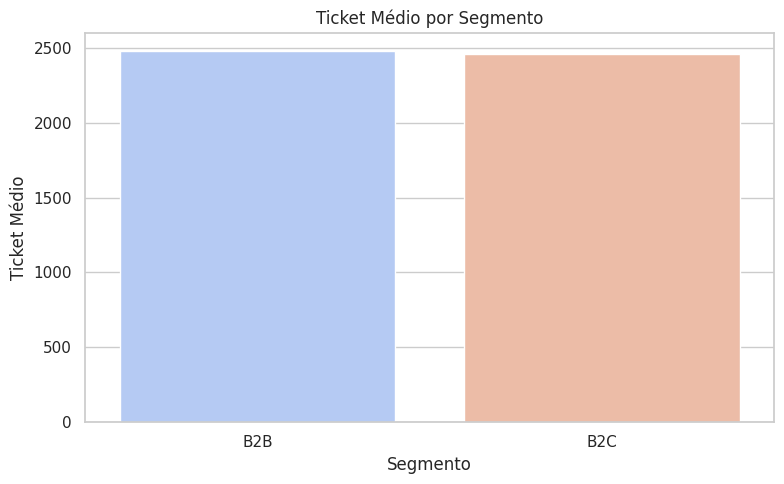

In [150]:
# Query SQL para calcular o ticket médio por segmento
query3 = """
SELECT
    c.segmento,
    AVG(v.valor_total) AS ticket_medio
FROM Vendas v
JOIN Clientes c ON v.id_cliente = c.id_cliente
GROUP BY c.segmento;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar os dados em um DataFrame
df3 = pd.read_sql_query(query3, conn)


# Criar o gráfico de barras para o ticket médio por segmento
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df3, x="segmento", y="ticket_medio", hue="segmento", palette="coolwarm", dodge=False, legend=False)
plt.title("Ticket Médio por Segmento")
plt.xlabel("Segmento")
plt.ylabel("Ticket Médio")

plt.tight_layout()
plt.show()



**4. Sazonalidade:**

Analise o padrão de vendas ao longo do ano, identificando picos e quedas, e proponha possíveis explicações baseadas no comportamento de compra.

        mes  qtd_total_vendas
0   2025-01                93
1   2025-02                39
2   2025-03                52
3   2025-04                92
4   2025-05                55
5   2025-06                86
6   2025-07               149
7   2025-08                50
8   2025-09               114
9   2025-10               118
10  2025-11                98
11  2025-12                39


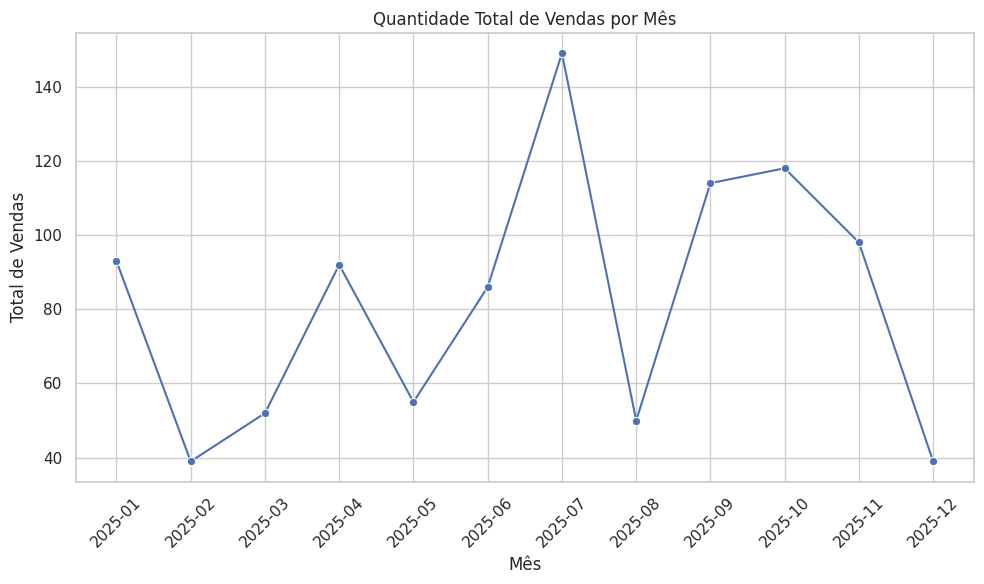

In [151]:
# Definir a query SQL
query4 = """
SELECT
    STRFTIME('%Y-%m', data_venda) as mes,
    COUNT(*) AS qtd_total_vendas
FROM Vendas
GROUP BY mes
ORDER BY mes;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar o resultado em um DataFrame
df4 = pd.read_sql_query(query4, conn)

# Fechar a conexão com o banco de dados
conn.close()

# Exibir o DataFrame (opcional)
print(df4)

# Criar o gráfico de linha para visualizar a quantidade total de vendas por mês
plt.figure(figsize=(10, 6))
sns.lineplot(data=df4, x="mes", y="qtd_total_vendas", marker="o")
plt.title("Quantidade Total de Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# B. Análise de Marketing


**5. Eficiência das Campanhas:**

Determine quais campanhas tiveram maior taxa de conversão, relacionando o número de interações do tipo "Conversão" com o orçamento e custo das campanhas.

         nome_campanha  orcamento    custo  total_interacoes  \
0       Campanha Nobis    1606.62  1595.67               749   
1       Campanha Ipsam    9292.03  9555.82               744   
2  Campanha Aspernatur    7732.77  5485.33               758   
3       Campanha Velit   10168.22  2988.19               699   
4        Campanha Sunt   18442.84  6574.57               786   

   total_conversoes  taxa_conversao  conversoes_por_orcamento  \
0                90       12.016021                  5.601822   
1                89       11.962366                  0.957810   
2                88       11.609499                  1.138014   
3                80       11.444921                  0.786765   
4                89       11.323155                  0.482572   

   conversoes_por_custo  
0              5.640264  
1              0.931370  
2              1.604279  
3              2.677206  
4              1.353701  


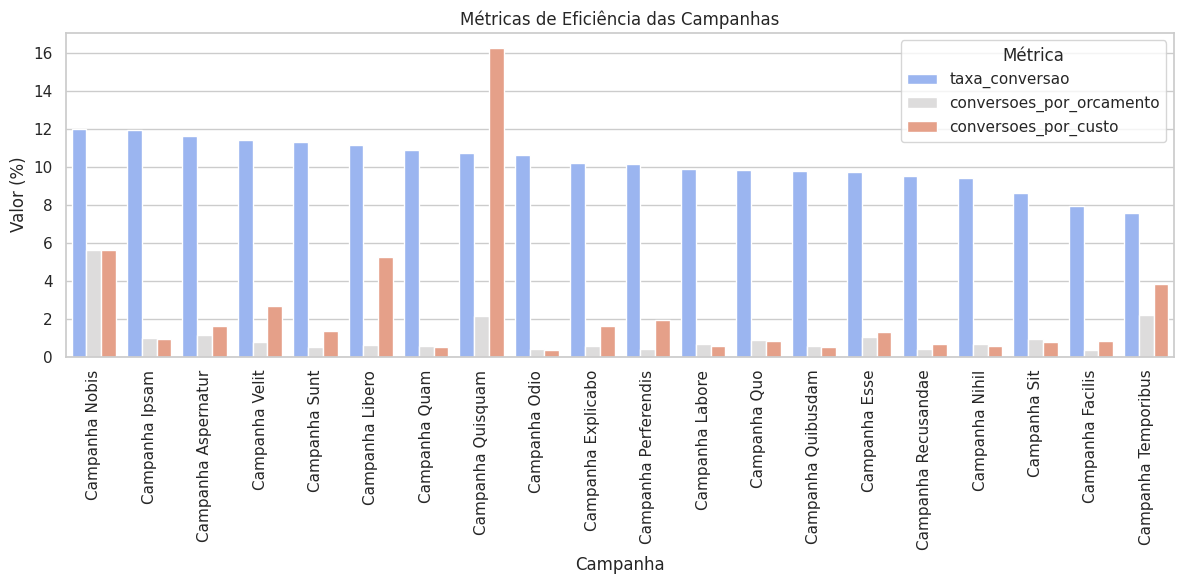

In [152]:
# Query SQL
query5 = """
SELECT
    c.nome_campanha,
    c.orcamento,
    c.custo,
    COUNT(i.id_interacao) AS total_interacoes,
    SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) AS total_conversoes,
    (SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) * 100.0) / NULLIF(COUNT(i.id_interacao), 0) AS taxa_conversao,
    (SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) * 100.0) / NULLIF(c.orcamento, 0) AS conversoes_por_orcamento,
    (SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) * 100.0) / NULLIF(c.custo, 0) AS conversoes_por_custo
FROM Campanhas_Marketing c
JOIN Interacoes_Marketing i ON c.id_campanha = i.id_campanha
GROUP BY c.nome_campanha, c.orcamento, c.custo
ORDER BY taxa_conversao DESC, conversoes_por_orcamento ASC, conversoes_por_custo ASC;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar o resultado em um DataFrame
df5 = pd.read_sql_query(query5, conn)

print(df5.head())

# Para facilitar a visualização, vamos "derreter" (melt) os dados:
# Dessa forma, teremos uma coluna para as campanhas, outra para a métrica e uma para o valor
df_melt = df5.melt(
    id_vars=["nome_campanha"],
    value_vars=["taxa_conversao", "conversoes_por_orcamento", "conversoes_por_custo"],
    var_name="Metrica",
    value_name="Valor"
)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x="nome_campanha", y="Valor", hue="Metrica", palette="coolwarm")
plt.title("Métricas de Eficiência das Campanhas")
plt.xlabel("Campanha")
plt.ylabel("Valor (%)")
plt.xticks(rotation=90)
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


**6. Canais de Marketing:**

Analise qual canal de marketing (Email, Google Ads, Meta Ads, etc.) gera maior engajamento dos clientes, baseado nas interações registradas.

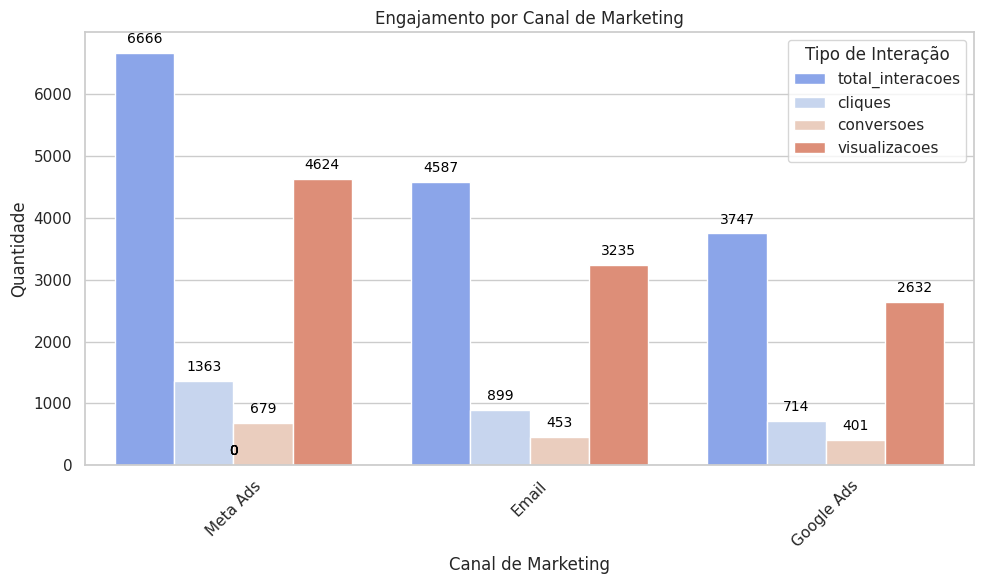

In [153]:
# Definir a query SQL
query6 = """
SELECT
    c.canal_marketing,
    COUNT(i.id_interacao) AS total_interacoes,
    SUM(CASE WHEN i.tipo_interacao = 'Clique' THEN 1 ELSE 0 END) AS cliques,
    SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) AS conversoes,
    SUM(CASE WHEN i.tipo_interacao = 'Visualização' THEN 1 ELSE 0 END) AS visualizacoes
FROM Interacoes_Marketing i
JOIN Campanhas_Marketing c ON i.id_campanha = c.id_campanha
GROUP BY c.canal_marketing
ORDER BY cliques DESC;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar os dados em um DataFrame
df6 = pd.read_sql_query(query6, conn)

# Derreter (melt) o DataFrame para facilitar a criação do gráfico agrupado
df_melt = df6.melt(
    id_vars=["canal_marketing"],
    value_vars=["total_interacoes", "cliques", "conversoes", "visualizacoes"],
    var_name="tipo_interacao",
    value_name="valor"
)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melt, x="canal_marketing", y="valor", hue="tipo_interacao", palette="coolwarm")

plt.title("Engajamento por Canal de Marketing")
plt.xlabel("Canal de Marketing")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Interação")
plt.tight_layout()

# Adicionar os valores nas barras
for p in ax.patches:
    # Obtém a altura da barra
    altura = p.get_height()
    # Adiciona o texto centralizado acima da barra
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# **C. Análise Integrada (Vendas e Marketing)**

**7. Relação Temporal:**

Investigue se há um aumento nas vendas de determinados produtos logo após o início de uma campanha de marketing.

Colunas originais: ['nome_produto', 'nome_campanha', 'data_inicio', 'data_fim', 'vendas_inicio_campanha', 'vendas_apos_campanha', 'total_vendas']
                          campanha_produto                 periodo  vendas
0       Campanha Esse - High Growth - Quis  vendas_inicio_campanha      11
1  Campanha Velit - GS Engage - Doloremque  vendas_inicio_campanha       8
2       Campanha Ipsam - Imersão - Aliquam  vendas_inicio_campanha       5
3       Campanha Velit - Growth Way - Modi  vendas_inicio_campanha      16
4   Campanha Libero - Station AI - Dolorem  vendas_inicio_campanha       0


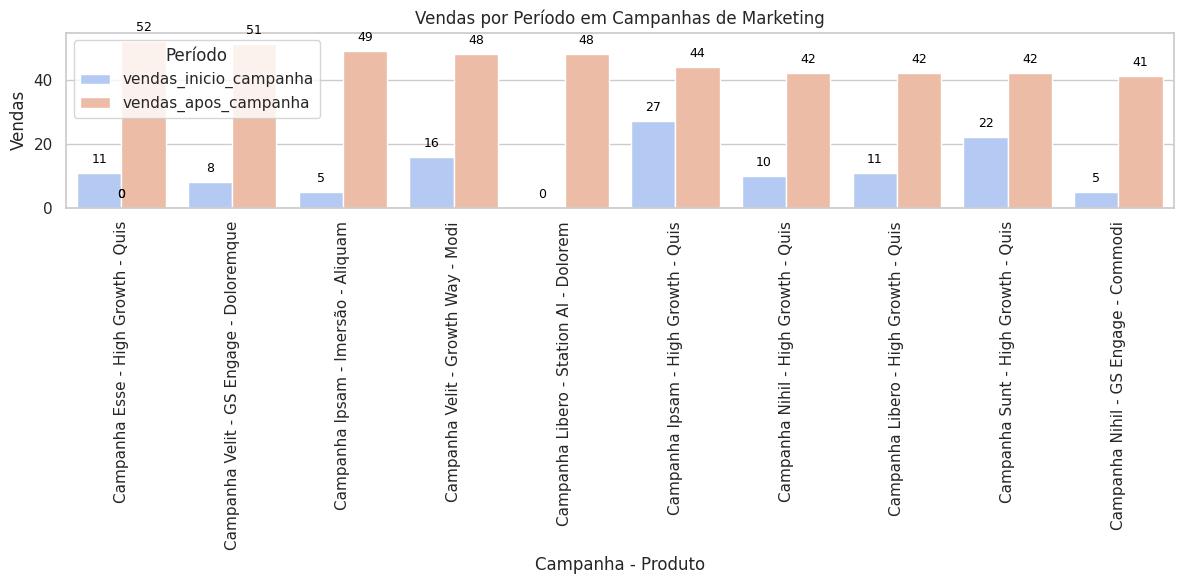

In [154]:
# Definir a query SQL
query7 = """
SELECT
    p.nome_produto,
    c.nome_campanha,
    c.data_inicio,
    c.data_fim,
    SUM(CASE WHEN v.data_venda BETWEEN c.data_inicio AND DATE(c.data_inicio, '+7 days') THEN v.quantidade ELSE 0 END) AS vendas_inicio_campanha,
    SUM(CASE WHEN v.data_venda BETWEEN DATE(c.data_inicio, '+8 days') AND DATE(c.data_inicio, '+30 days') THEN v.quantidade ELSE 0 END) AS vendas_apos_campanha,
    SUM(v.quantidade) AS total_vendas
FROM Vendas v
JOIN Produtos p ON v.id_produto = p.id_produto
JOIN Campanhas_Marketing c ON v.data_venda BETWEEN c.data_inicio AND DATE(c.data_fim, '+30 days')
GROUP BY p.nome_produto, c.nome_campanha, c.data_inicio, c.data_fim
ORDER BY c.data_inicio DESC, vendas_apos_campanha DESC;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar o resultado em um DataFrame
df7 = pd.read_sql_query(query7, conn)

print("Colunas originais:", df7.columns.tolist())

# Limitar aos top 10 produtos com mais vendas após a campanha
df_top10 = df7.nlargest(10, 'vendas_apos_campanha')

# Criar uma coluna combinada para identificar a campanha e o produto
# Aqui usamos os nomes em minúsculas (nome_campanha e nome_produto)
df_top10['campanha_produto'] = df_top10['nome_campanha'] + ' - ' + df_top10['nome_produto']

# Derreter (melt) o DataFrame para "empilhar" as métricas de vendas por período
df_melt = df_top10.melt(
    id_vars=['campanha_produto'],
    value_vars=['vendas_inicio_campanha', 'vendas_apos_campanha'],
    var_name='periodo',
    value_name='vendas'
)

# Exibir o DataFrame derretido (opcional)
print(df_melt.head())

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x='campanha_produto', y='vendas', hue='periodo', palette='coolwarm')
plt.title("Vendas por Período em Campanhas de Marketing")
plt.xlabel("Campanha - Produto")
plt.ylabel("Vendas")
plt.xticks(rotation=90)
plt.legend(title='Período')
plt.tight_layout()

# Adicionar os valores nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

**8. Análise Regional:**

Explore se determinadas cidades apresentam melhor resposta às campanhas de marketing e como isso se reflete nas vendas.

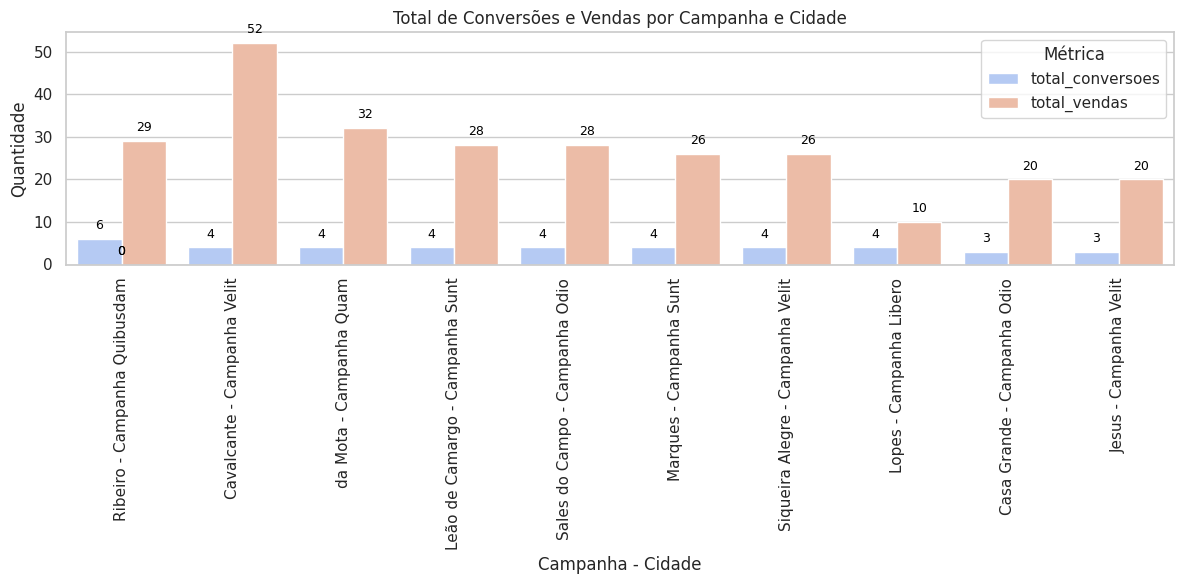

<ipython-input-155-64673b1fb0d2>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df_top10, x='campanha_cidade', y='taxa_conversao', palette='coolwarm')


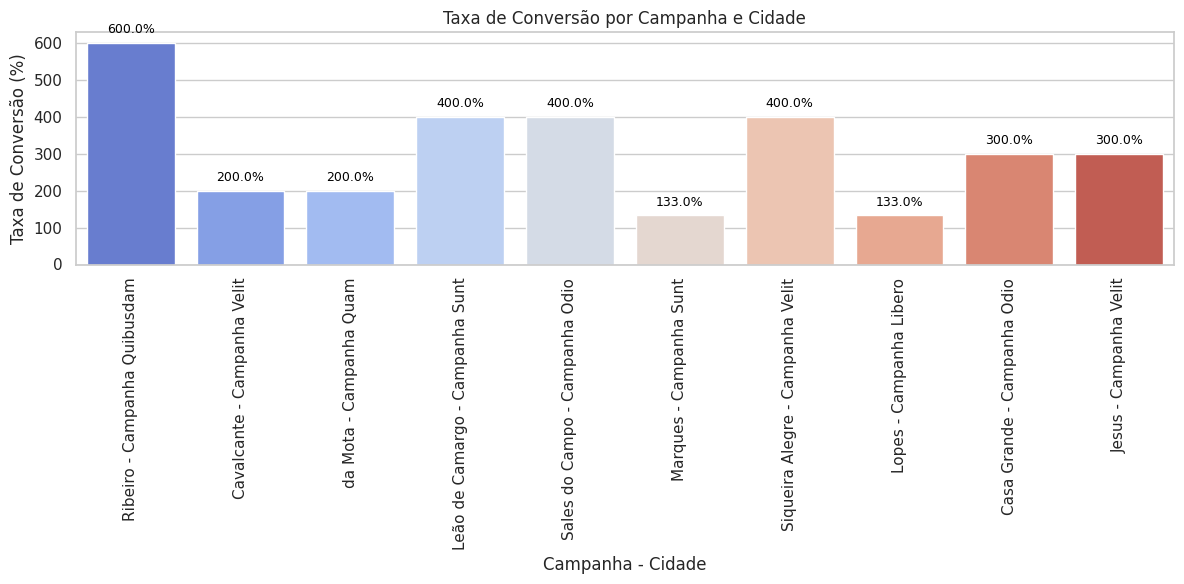

In [155]:
# Definir a query SQL
query8 = """
SELECT
    c.cidade,
    m.nome_campanha,
    m.data_inicio,
    m.data_fim,
    COUNT(DISTINCT i.id_interacao) AS total_interacoes,
    SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) AS total_conversoes,
    SUM(v.quantidade) as total_vendas,
    (SUM(CASE WHEN i.tipo_interacao = 'Conversão' THEN 1 ELSE 0 END) * 100) / NULLIF(COUNT(DISTINCT i.id_interacao), 0) AS taxa_conversao
FROM Vendas v
JOIN Clientes c ON v.id_cliente = c.id_cliente
JOIN Campanhas_Marketing m ON v.data_venda BETWEEN m.data_inicio AND DATE(m.data_fim, '+30 days') AND v.id_campanha = m.id_campanha
JOIN Interacoes_Marketing i ON i.id_campanha = m.id_campanha AND i.id_cliente = v.id_cliente AND m.id_campanha = i.id_campanha
GROUP BY c.cidade, m.nome_campanha, m.data_inicio, m.data_fim
ORDER BY total_conversoes DESC, total_vendas DESC;
"""

#Upload Dataset
db_path = "/content/vendas_marketing.db"

#Conectando com o SQLite
conn = sqlite3.connect(db_path)

# Executar a query e carregar o resultado em um DataFrame
df8 = pd.read_sql_query(query8, conn)

# Limitar aos top 10 resultados por total de conversões
df_top10 = df8.nlargest(10, 'total_conversoes')

# Criar uma coluna combinada para facilitar a visualização: "cidade - nome_campanha"
df_top10['campanha_cidade'] = df_top10['cidade'] + ' - ' + df_top10['nome_campanha']

# Gráfico 1: Comparação de Total de Conversões e Total de Vendas
# Derreter o DataFrame para "empilhar" as métricas
df_melt = df_top10.melt(
    id_vars=['campanha_cidade'],
    value_vars=['total_conversoes', 'total_vendas'],
    var_name='métrica',
    value_name='valor'
)

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=df_melt, x='campanha_cidade', y='valor', hue='métrica', palette='coolwarm')
plt.title("Total de Conversões e Vendas por Campanha e Cidade")
plt.xlabel("Campanha - Cidade")
plt.ylabel("Quantidade")
plt.xticks(rotation=90)
plt.legend(title="Métrica")
plt.tight_layout()

# Adicionar os valores sobre as barras
for p in ax1.patches:
    altura = p.get_height()
    ax1.annotate(f'{int(altura)}',
                 (p.get_x() + p.get_width() / 2., altura),
                 ha='center', va='bottom',
                 fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# ---------------------------------------------
# Gráfico 2: Taxa de Conversão por Campanha e Cidade
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=df_top10, x='campanha_cidade', y='taxa_conversao', palette='coolwarm')
plt.title("Taxa de Conversão por Campanha e Cidade")
plt.xlabel("Campanha - Cidade")
plt.ylabel("Taxa de Conversão (%)")
plt.xticks(rotation=90)
plt.tight_layout()

# Adicionar os valores (formatados com uma casa decimal) sobre as barras
for p in ax2.patches:
    altura = p.get_height()
    ax2.annotate(f'{altura:.1f}%',
                 (p.get_x() + p.get_width() / 2., altura),
                 ha='center', va='bottom',
                 fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()
